In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


In [3]:
# Load a structured dataset (Example: Loan Default Prediction)
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=5000, n_features=10, random_state=42,
                           n_informative=8, n_redundant=2, class_sep=1.5)

# Convert to DataFrame
columns = [f'Feature_{i}' for i in range(1, 11)]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display dataset info
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,-0.454698,-5.526432,-1.825598,1.151199,-0.404957,5.610270,6.040204,-2.071058,-2.887684,-4.607063,1
1,2.219036,-5.258578,-5.328796,4.818680,-3.629748,-2.074312,0.798912,4.375324,0.239433,0.008207,1
2,0.752386,-0.152589,-1.315383,-0.351713,-2.572995,-4.223329,-1.146902,-0.790276,-1.844175,-2.718642,1
3,1.158385,0.725425,0.356906,0.026592,0.035018,-1.483631,0.377345,-0.578786,-0.903549,-1.531167,1
4,1.605373,-4.408678,-3.808508,1.993344,0.136864,2.405277,1.676829,-1.208483,-1.473652,-1.489264,1


In [4]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)


Decision Tree Accuracy: 0.9350
Random Forest Accuracy: 0.9710
Gradient Boosting Accuracy: 0.9540


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9720
               Model  Accuracy
0      Decision Tree     0.935
1      Random Forest     0.971
2  Gradient Boosting     0.954
3            XGBoost     0.972


<ipython-input-6-e9d4e803f456>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["Accuracy"], palette="coolwarm")


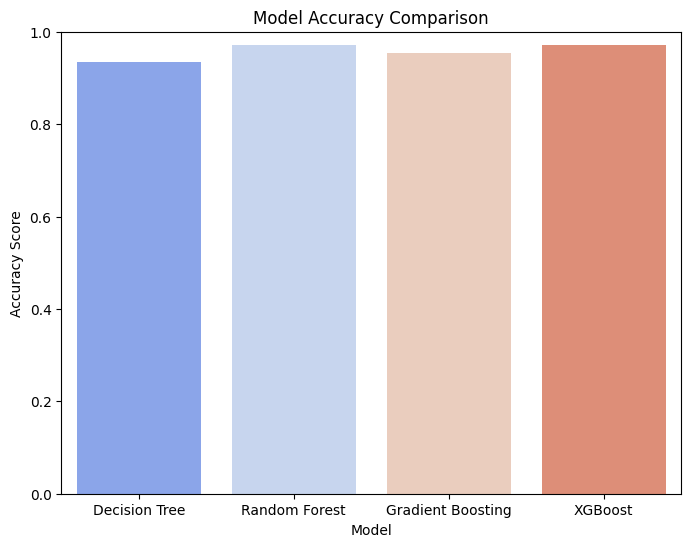

In [6]:
# Plot model comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df["Model"], y=results_df["Accuracy"], palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()


<ipython-input-8-4bb539a01980>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances_rf, palette="Blues_r")


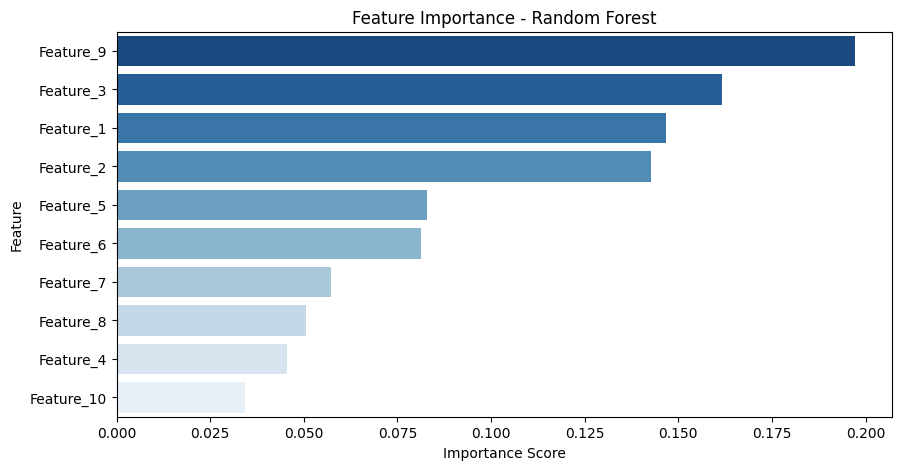

Random Forest Accuracy: 0.971
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       513
           1       0.98      0.96      0.97       487

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [8]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Feature Importance Plot for Random Forest
feature_importances_rf = pd.DataFrame({"Feature": columns, "Importance": rf_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances_rf, palette="Blues_r")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


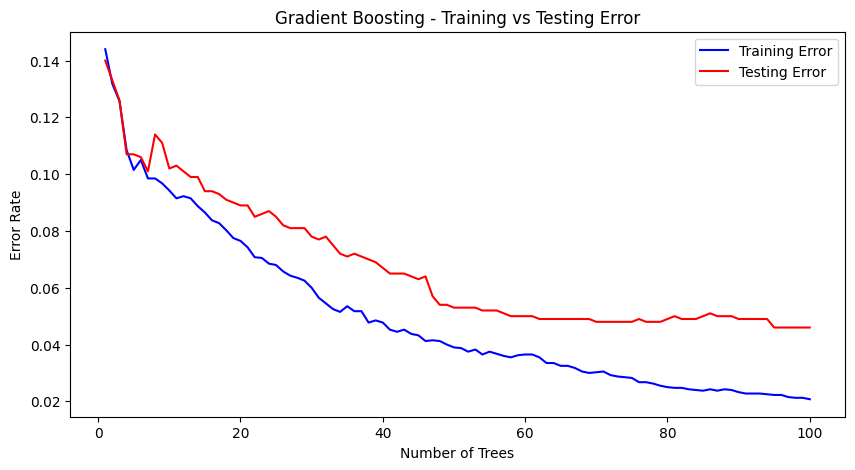

Gradient Boosting Accuracy: 0.954
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       513
           1       0.96      0.94      0.95       487

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [9]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Plot Training Loss Curve
train_errors = []
test_errors = []

for n in range(1, 101):
    gb = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    gb.fit(X_train, y_train)
    train_errors.append(1 - gb.score(X_train, y_train))
    test_errors.append(1 - gb.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), train_errors, label="Training Error", color="blue")
plt.plot(range(1, 101), test_errors, label="Testing Error", color="red")
plt.xlabel("Number of Trees")
plt.ylabel("Error Rate")
plt.title("Gradient Boosting - Training vs Testing Error")
plt.legend()
plt.show()

# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-10-83988a8371fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances_xgb, palette="Greens_r")


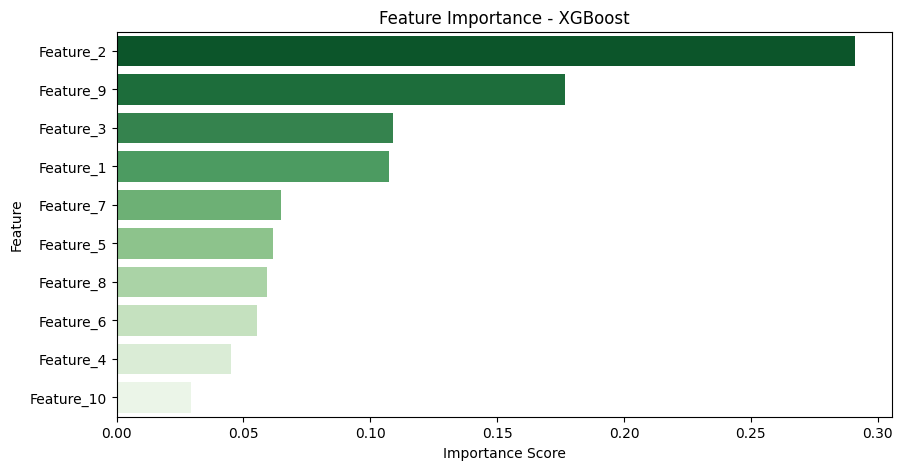

XGBoost Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       513
           1       0.98      0.96      0.97       487

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [10]:
# Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Feature Importance Plot for XGBoost
feature_importances_xgb = pd.DataFrame({"Feature": columns, "Importance": xgb_model.feature_importances_})
feature_importances_xgb = feature_importances_xgb.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances_xgb, palette="Greens_r")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
